In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Завантаження даних з CSV-файлу
data = pd.read_csv('shopping_trends.csv')

# Виведемо інформацію про дані, розмір таблиці та кількість пропусків
print("Інформація про дані:")
print(data.info())
print("\nРозмір таблиці:", data.shape)
print("\nКількість пропусків:")
print(data.isnull().sum())

Інформація про дані:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   

In [10]:
# Виберемо числові стовпці
numerical_cols = ["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]

# Створимо новий DataFrame, який міститиме лише числові стовпці
numeric_data = data[numerical_cols]

# Перейменуємо стовпці
numeric_data.columns = [col.lower().replace(" ", "_") for col in numeric_data.columns]

# Масштабування даних для нормалізації
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

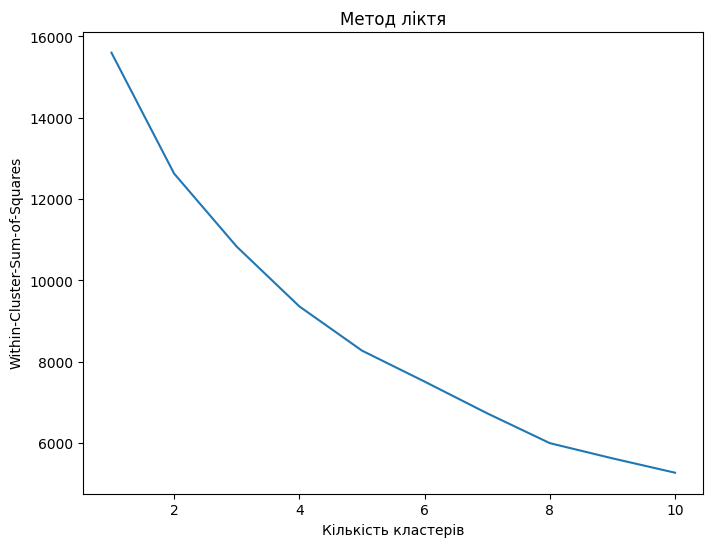

In [11]:
# Визначення оптимальної кількості кластерів за допомогою методу ліктя
wcss = []  # Within-Cluster-Sum-of-Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Побудова графіка методу ліктя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Within-Cluster-Sum-of-Squares')
plt.show()

# За результатами графіка обираємо оптимальну кількість кластерів, наприклад, 3

In [12]:
# Кластеризація за допомогою K-means з обраною кількістю кластерів
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)

# Додамо ідентифікатор кластера до початкового DataFrame
data['Cluster'] = cluster_labels

# Візуалізація результатів, використовуючи PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
final_df = pd.concat([principal_df, data['Cluster']], axis=1)

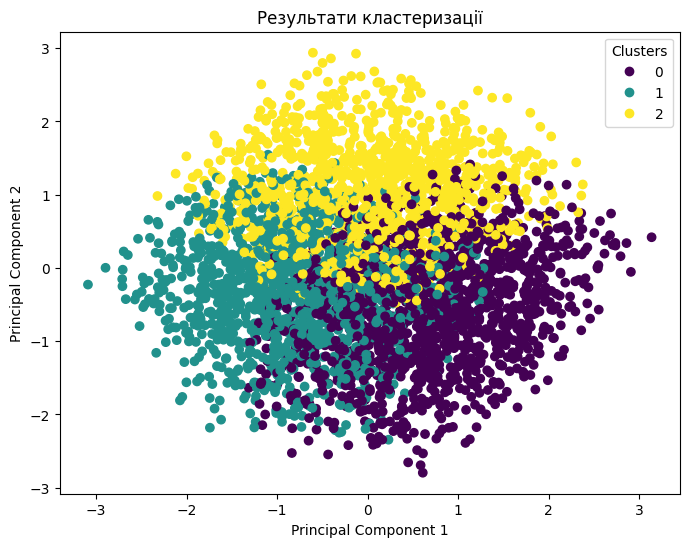

In [13]:
# Графічне представлення результатів
plt.figure(figsize=(8, 6))
scatter = plt.scatter(final_df['PC1'], final_df['PC2'], c=final_df['Cluster'], cmap='viridis')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('Результати кластеризації')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Висновки:

За результатами кластеризації за допомогою K-means було виділено три кластери, що допомагає краще розуміти схожість та відмінність між групами споживачів.
Оптимальна кількість кластерів була визначена за допомогою методу ліктя, який допомагає уникнути перекластеризації або недокластеризації.
Візуалізація результатів за допомогою PCA допомагає відобразити кластери в двовимірному просторі для подальшого аналізу та прийняття рішень.
За допомогою цієї кластеризації, бізнес може вдосконалити свої стратегії маркетингу, обслуговування клієнтів та аналізу покупок, щоб краще відповідати потребам різних груп споживачів.